In [179]:
import warnings
warnings.filterwarnings('ignore')

In [180]:
# Import Python libraries

In [181]:
import pandas as pd
import numpy as np
import statistics

In [182]:
# import the train dataset

In [183]:
df = pd.read_csv(r'C:\Users\Abhin\OneDrive\Desktop\Machine Learning Projects\Loan Prediction Problem Dataset\train_ctrUa4K.csv')

# Showing the dataset

In [185]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 278.7 KB


In [186]:
df.describe().round().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.0,6109.0,150.0,2878.0,3812.0,5795.0,81000.0
CoapplicantIncome,614.0,1621.0,2926.0,0.0,0.0,1188.0,2297.0,41667.0
LoanAmount,592.0,146.0,86.0,9.0,100.0,128.0,168.0,700.0
Loan_Amount_Term,600.0,342.0,65.0,12.0,360.0,360.0,360.0,480.0
Credit_History,564.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0


# Exploratory Data Analysis(EDA)

In [188]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [189]:
#checking any duplicate data are present or not in any row
df.duplicated().sum()

0

# Gender 

In [191]:
#check how many distinct value contain Gender column
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [192]:
# checking the record which gender have more frequency(Male or Female) so i can replace the null value with highest frequency of Gender
df.Gender.value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [193]:
# so i replace the nan value with male bcoz the count of male is more than female in Gender column
mode_value = statistics.mode(df.Gender)
df.Gender = df.Gender.fillna(mode_value)

In [194]:
# now we are convert the gender column data type obj to int........for eg "Male" to 1 and "female" to 0
df.Gender = df.Gender.apply(lambda x: 1 if x == "Male" else 0)
df.sample(n = 5,random_state = 42)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
350,LP002139,1,Yes,0,Graduate,No,9083,0.0,228.0,360.0,1.0,Semiurban,Y
377,LP002223,1,Yes,0,Graduate,No,4310,0.0,130.0,360.0,NaN,Semiurban,Y
163,LP001570,1,Yes,2,Graduate,No,4167,1447.0,158.0,360.0,1.0,Rural,Y
609,LP002978,0,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
132,LP001478,1,No,0,Graduate,No,2718,0.0,70.0,360.0,1.0,Semiurban,Y


# Married

In [196]:
df.Married.value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [197]:
df[df.Married.isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,1,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,1,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,0,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [198]:
# Married People are more than unmarried so i replace null value to married 
mode_value = statistics.mode(df.Married)
df.Married = df.Married.fillna(mode_value)

In [199]:
# now we are convert the Married column data type obj to int........for eg "Yes" to 1 and "No" to 0
df.Married = df.Married.apply(lambda x: 1 if x == "Yes" else 0)
df.sample(n = 5,random_state = 42)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
350,LP002139,1,1,0,Graduate,No,9083,0.0,228.0,360.0,1.0,Semiurban,Y
377,LP002223,1,1,0,Graduate,No,4310,0.0,130.0,360.0,NaN,Semiurban,Y
163,LP001570,1,1,2,Graduate,No,4167,1447.0,158.0,360.0,1.0,Rural,Y
609,LP002978,0,0,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
132,LP001478,1,0,0,Graduate,No,2718,0.0,70.0,360.0,1.0,Semiurban,Y


# Dependents

In [201]:
df.Dependents.value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [202]:
df.loc[(df.Dependents == "3+") & (df.CoapplicantIncome >= 0.0) & (df.Credit_History==0.0)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
7,LP001014,1,1,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
73,LP001250,1,1,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
78,LP001263,1,1,3+,Graduate,No,3167,4000.0,180.0,300.0,0.0,Semiurban,N
155,LP001536,1,1,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
177,LP001610,1,1,3+,Graduate,No,5516,11300.0,495.0,360.0,0.0,Semiurban,N
211,LP001711,1,1,3+,Graduate,No,3430,1250.0,128.0,360.0,0.0,Semiurban,N
267,LP001882,1,1,3+,Graduate,No,4333,1811.0,160.0,360.0,0.0,Urban,Y
338,LP002113,0,0,3+,Not Graduate,No,1830,0.0,NaN,360.0,0.0,Urban,N
409,LP002317,1,1,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N
466,LP002500,1,1,3+,Not Graduate,No,2947,1664.0,70.0,180.0,0.0,Urban,N


In [203]:
# Replacing 3+ with 
df.Dependents = df.Dependents.apply(lambda x : 3 if x == "3+" else x)

In [204]:
df.Dependents = df.Dependents.apply(lambda x : 0 if x == "0" else x)

In [205]:
df.Dependents = df.Dependents.apply(lambda x : 1 if x == "1" else x)

In [206]:
df.Dependents = df.Dependents.apply(lambda x : 2 if x == "2" else x)

In [207]:
mode_value = statistics.mode(df.Dependents)
df.Dependents = df.Dependents.fillna(mode_value)

In [208]:
df.Dependents = df.Dependents.astype('int')

# Education

In [210]:
df.Education.value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [211]:
df.Education.isna().sum()

0

In [212]:
# Replacing the categorical value to numerical value for eg Graduate with 1 and Not Graduate with 0

In [213]:
df.Education = df.Education.apply(lambda x: 1 if x == 'Graduate' else 0)

# Self Employed

In [215]:
df.Self_Employed.value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [216]:
df.Self_Employed.isna().sum()

32

In [217]:
df[df.Self_Employed.isna()].head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,LP001027,1,1,2,1,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
19,LP001041,1,1,0,1,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
24,LP001052,1,1,1,1,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,LP001087,0,0,2,1,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,LP001091,1,1,1,1,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N


In [218]:
# So i replacing the nan value to No bcoz we can't drop the nan value just bcoz of we have less data and the freuqency of no is nore so replace with it.
mode_value = statistics.mode(df.Self_Employed)
df.Self_Employed = df.Self_Employed.fillna(mode_value)

In [219]:
df.Self_Employed = df.Self_Employed.apply(lambda x: 1 if x == "Yes" else 0)

In [220]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,Y


# ApplicantIncome

In [222]:
df.ApplicantIncome.isna().sum()

0

In [223]:
# Q1 = np.percentile(df.ApplicantIncome,25)
# Q3 = np.percentile(df.ApplicantIncome,75)
# IQR = Q3 - Q1
# print(IQR)

In [224]:
# temp = (15 * IQR)/10
# Lower_bound = temp-Q1
# Upper_bound = Q3 + temp
# print(Lower_bound,Upper_bound)

In [225]:
# df[(df.ApplicantIncome >=1498.75) & (df.ApplicantIncome <= 10171.25)]

# CoapplicantIncome

In [227]:
df.CoapplicantIncome.isna().sum()

0

# LoanAmount

In [229]:
df.LoanAmount.isna().sum()

22

In [230]:
df.LoanAmount = df.groupby('Education')['LoanAmount'].transform(lambda x : x.fillna(x.median()))

In [231]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,132.0,360.0,1.0,Urban,Y
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,Y


# Loan_Amount_Term

In [233]:
df.Loan_Amount_Term.isna().sum()

14

In [234]:
df.Loan_Amount_Term.value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [235]:
mode_value = statistics.mode(df.Loan_Amount_Term)
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(mode_value)

# Credit_History

In [237]:
df.Credit_History.isna().sum()

50

In [238]:
df.Credit_History.value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [239]:
df[(df.Credit_History==0) & (df.ApplicantIncome > 7000)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
20,LP001043,1,1,0,0,0,7660,0.0,104.0,360.0,0.0,Urban,N
54,LP001186,0,1,1,1,1,11500,0.0,286.0,360.0,0.0,Urban,N
128,LP001451,1,1,1,1,1,10513,3850.0,160.0,180.0,0.0,Urban,N
138,LP001492,1,0,0,1,0,14999,0.0,242.0,360.0,0.0,Semiurban,N
155,LP001536,1,1,3,1,0,39999,0.0,600.0,180.0,0.0,Semiurban,Y
254,LP001844,1,0,0,1,1,16250,0.0,192.0,360.0,0.0,Urban,N
325,LP002067,1,1,1,1,1,8666,4983.0,376.0,360.0,0.0,Rural,N
408,LP002315,1,1,1,1,0,8300,0.0,152.0,300.0,0.0,Semiurban,N
409,LP002317,1,1,3,1,0,81000,0.0,360.0,360.0,0.0,Rural,N
423,LP002362,1,1,1,1,0,7250,1667.0,110.0,360.0,0.0,Urban,N


In [240]:
mode_value = statistics.mode(df.Credit_History)
df.Credit_History = df.Credit_History.fillna(mode_value)

# Property_Area

In [242]:
df.Property_Area.isna().sum()

0

In [243]:
df.Property_Area.value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [244]:
def area(temp):
    if temp == "Rural":
        return 0
    elif temp == "Urban":
        return 1
    else:
        return 2

In [245]:
df.Property_Area = df.Property_Area.apply(area)

# Loan_Status

In [247]:
df.Loan_Status.isna().sum()

0

In [248]:
df.Loan_Status.value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [249]:
# creating a new column which is Total_Income and it is sum of ApplicantIncome and CoapplicantIncome
df['Total_Income'] = df.ApplicantIncome + df.CoapplicantIncome
# Now ApplicantIncome and CoapplicantIncome columns are useless so we are removing them from dataset
df.drop(['ApplicantIncome','CoapplicantIncome'],axis = 1,inplace=True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,1,0,0,1,0,132.0,360.0,1.0,1,Y,5849.0
1,LP001003,1,1,1,1,0,128.0,360.0,1.0,0,N,6091.0
2,LP001005,1,1,0,1,1,66.0,360.0,1.0,1,Y,3000.0
3,LP001006,1,1,0,0,0,120.0,360.0,1.0,1,Y,4941.0
4,LP001008,1,0,0,1,0,141.0,360.0,1.0,1,Y,6000.0


In [250]:
df.Loan_Status = df.Loan_Status.apply(lambda x: 1 if x == "Y" else 0)

In [251]:
independent_variable = df.drop(['Loan_Status','Loan_ID'],axis = 1)

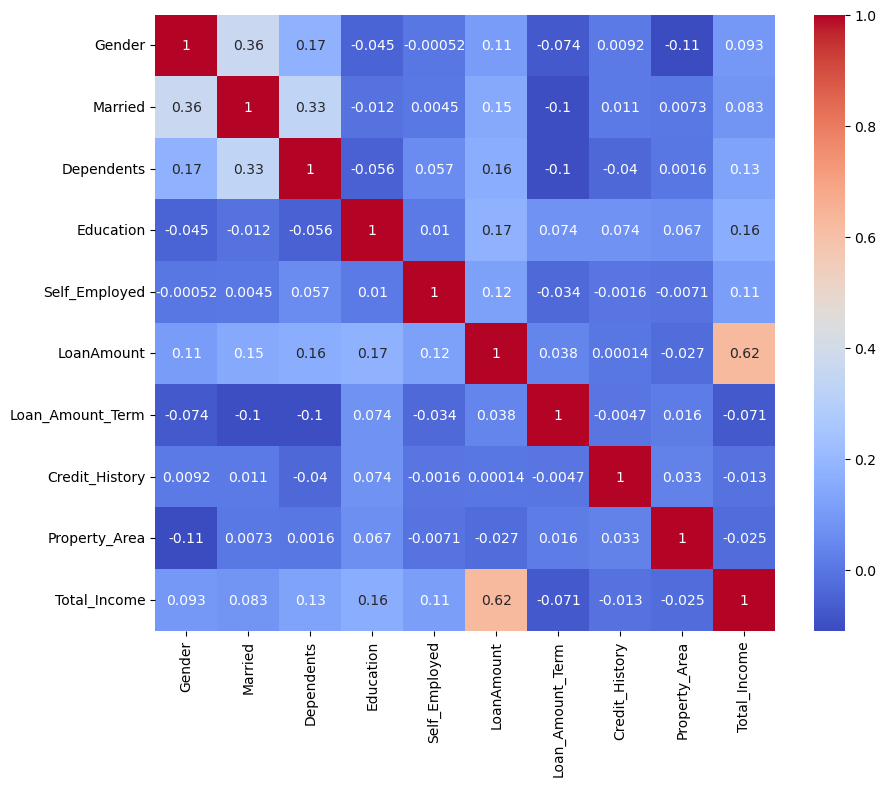

In [252]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))  # width=10, height=8 (in inches)
sns.heatmap(independent_variable.corr(), annot=True, cmap='coolwarm')
plt.show()

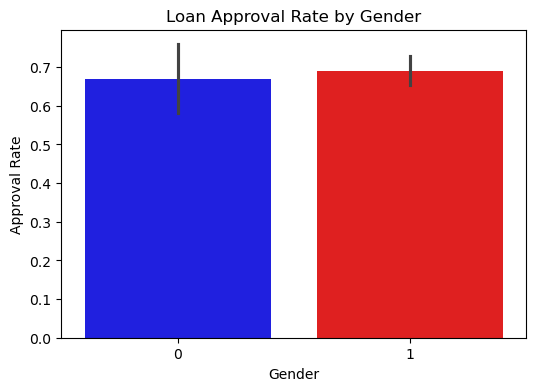

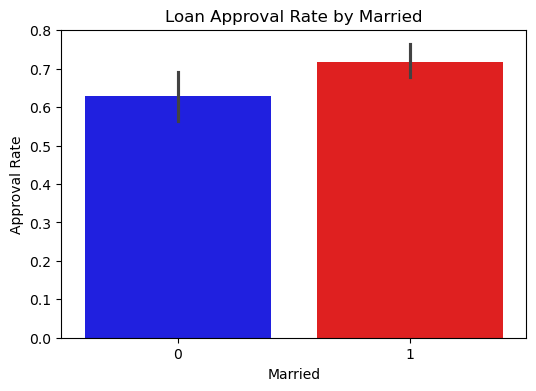

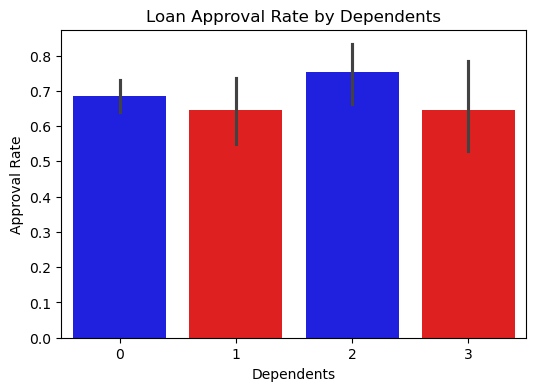

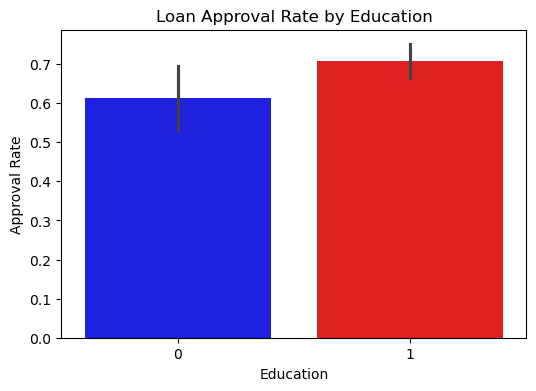

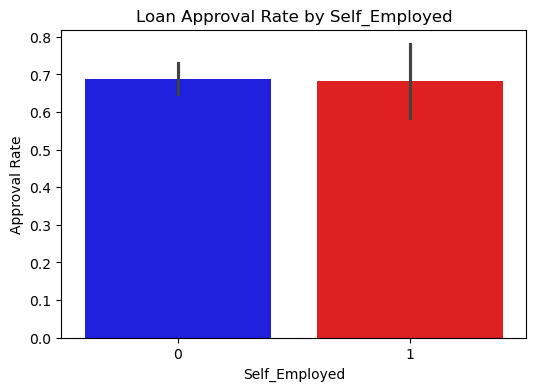

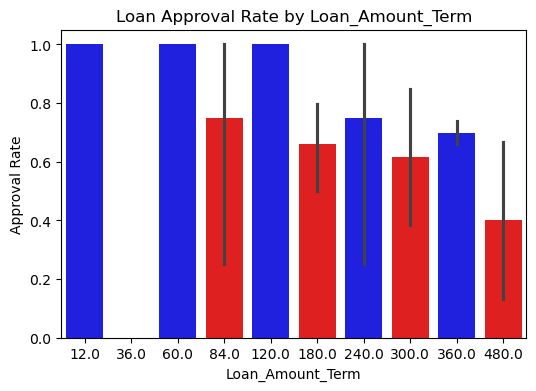

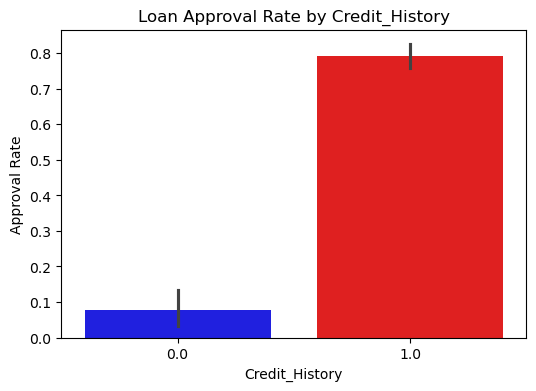

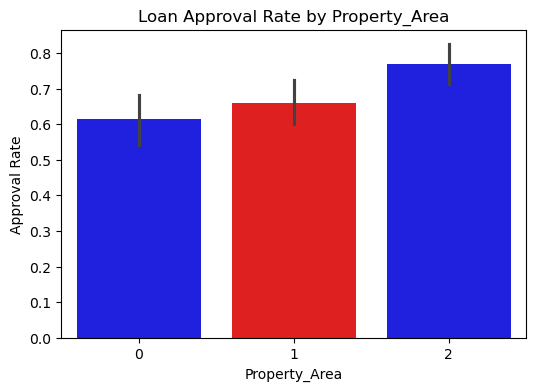

In [253]:
categorical_col = ['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area']
for col in categorical_col:
    plt.figure(figsize=(6,4))
    sns.barplot(x=col, y='Loan_Status', data=df,palette=  ['Blue','Red'])
    plt.title(f'Loan Approval Rate by {col}')
    plt.ylabel('Approval Rate')
    plt.show()

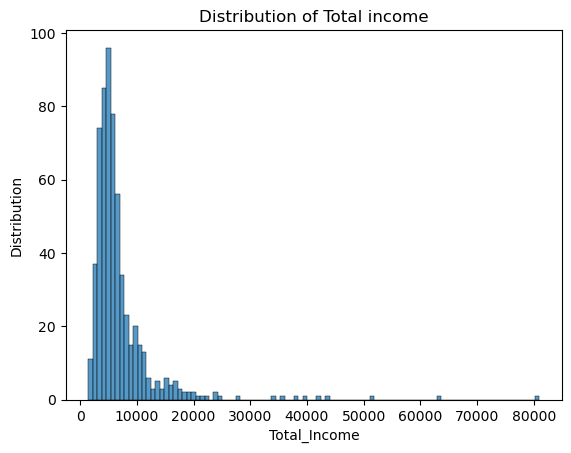

In [254]:
# Ditribution of Total_Income and Loan_Amount
sns.histplot(data=df,x='Total_Income')
plt.title("Distribution of Total income")
plt.ylabel('Distribution')
plt.show()

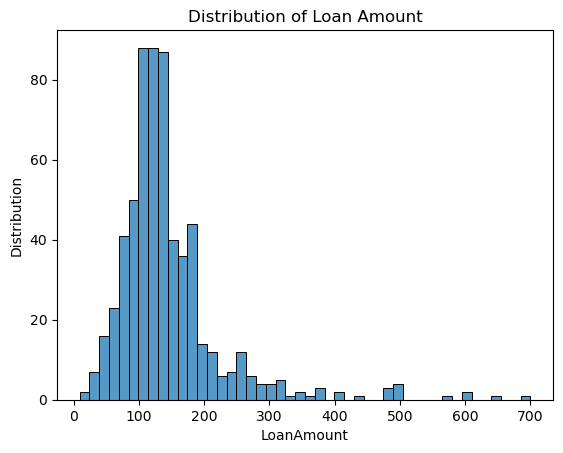

In [255]:
sns.histplot(data=df,x='LoanAmount')
plt.title("Distribution of Loan Amount")
plt.ylabel("Distribution")
plt.show()

In [256]:
# Feature Scaling using RandomForest Algorithm to reduce complexity 
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
X = df.drop(['Loan_Status','Loan_ID'],axis=1)
y = df['Loan_Status'].copy()
rfc.fit(X,y)

RandomForestClassifier(random_state=42)

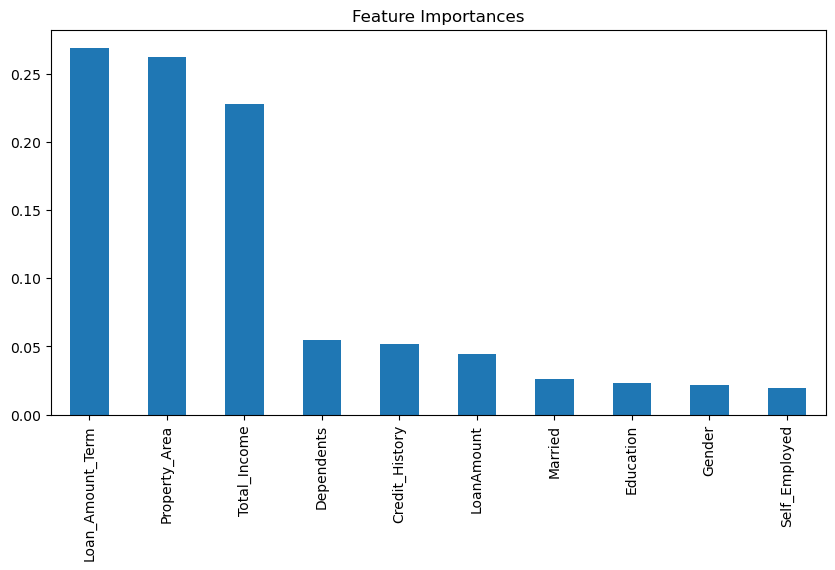

In [257]:
feature_names = ['Gender', 'Married', 'Dependents', 'Education',
                 'Self_Employed', 'Total_Income',
                 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']

importances = rfc.feature_importances_
feat_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

feat_importance.plot(kind='bar', figsize=(10, 5), title="Feature Importances")
plt.show()

# Creating Machine Learning Model

In [259]:
print(feat_importance)

Loan_Amount_Term    0.268782
Property_Area       0.262165
Total_Income        0.227683
Dependents          0.054612
Credit_History      0.051429
LoanAmount          0.044393
Married             0.026170
Education           0.023310
Gender              0.022005
Self_Employed       0.019451
dtype: float64


In [260]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,1,0,0,1,0,132.0,360.0,1.0,1,1,5849.0
1,LP001003,1,1,1,1,0,128.0,360.0,1.0,0,0,6091.0
2,LP001005,1,1,0,1,1,66.0,360.0,1.0,1,1,3000.0
3,LP001006,1,1,0,0,0,120.0,360.0,1.0,1,1,4941.0
4,LP001008,1,0,0,1,0,141.0,360.0,1.0,1,1,6000.0


In [261]:
# Taking Top 7 column to reduce the complexity and train the dataset
imp_feature = feat_importance.iloc[:7].index

In [262]:
X = df[imp_feature]
y =  df.Loan_Status # Align target

 # Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=42,stratify=y)
y_train.value_counts()

Loan_Status
1    295
0    134
Name: count, dtype: int64

In [263]:
# Stacking Ensemble Model: Training, Tuning & Evaluation¶
# Base Models:
# We used three strong classifiers as base learners:

# Random Forest (class_weight='balanced')
# Support Vector Classifier (class_weight='balanced')
# XGBoost Classifier (with scale_pos_weight to handle imbalance)
# Meta Learner:
# Logistic Regression
# Hyperparameter Tuning:
# We used RandomizedSearchCV to tune both the final estimator and the number/depth of trees in the Random Forest:

In [264]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
rf = RandomForestClassifier(class_weight='balanced',n_estimators=100, random_state=42)
svc = SVC(class_weight='balanced',random_state=42, probability=True)

neg_class, pos_class = (y_train == 0).sum(), (y_train == 1).sum()
xgb = XGBClassifier(eval_metric='logloss',random_state=42,scale_pos_weight=neg_class / pos_class)

In [265]:
base_learners = [
    ('rf', rf),
    ('svc', svc),
    ('xgb', xgb)
]

In [266]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

In [267]:
meta_learner = LogisticRegression()

In [268]:
stackModel = StackingClassifier(estimators=base_learners,final_estimator=meta_learner,cv=5)

In [269]:
param_dist = {
    'final_estimator__C': [0.01, 0.1, 1, 10],
    'estimators': [[
        ('rf', RandomForestClassifier(n_estimators=n, max_depth=d, random_state=42)),
        ('svc', svc), 
        ('xgb', xgb)
    ] for n in [100, 150] for d in [3, 5, 7]]
}

In [270]:
from sklearn.model_selection import RandomizedSearchCV

In [271]:
random_search_stack = RandomizedSearchCV(stackModel,
                                         param_distributions=param_dist,
                                         cv=4,
                                         n_iter=10,
                                         n_jobs=-1,
                                         random_state=42,
                                         verbose=1,
                                         scoring='accuracy'
)
random_search_stack.fit(X_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4,
                   estimator=StackingClassifier(cv=5,
                                                estimators=[('rf',
                                                             RandomForestClassifier(class_weight='balanced',
                                                                                    random_state=42)),
                                                            ('svc',
                                                             SVC(class_weight='balanced',
                                                                 probability=True,
                                                                 random_state=42)),
                                                            ('xgb',
                                                             XGBClassifier(base_score=None,
                                                                           booster=None,
                                                                           callbacks=None,
                                                                           colsample_bylevel=None,
                                                                           colsample_bynode=None,
                                                                           colsample_bytree=None,
                                                                           device=...
                                                                       learning_rate=None,
                                                                       max_bin=None,
                                                                       max_cat_threshold=None,
                                                                       max_cat_to_onehot=None,
                                                                       max_delta_step=None,
                                                                       max_depth=None,
                                                                       max_leaves=None,
                                                                       min_child_weight=None,
                                                                       missing=nan,
                                                                       monotone_constraints=None,
                                                                       multi_strategy=None,
                                                                       n_estimators=None,
                                                                       n_jobs=None,
                                                                       num_parallel_tree=None, ...))]],
                                        'final_estimator__C': [0.01, 0.1, 1,
                                                               10]},
                   random_state=42, scoring='accuracy', verbose=1)

In [272]:
random_search_stack.best_params_

{'final_estimator__C': 1,
 'estimators': [('rf',
   RandomForestClassifier(max_depth=5, n_estimators=150, random_state=42)),
  ('svc', SVC(class_weight='balanced', probability=True, random_state=42)),
  ('xgb',
   XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=None,
                 colsample_bytree=None, device=None, early_stopping_rounds=None,
                 enable_categorical=False, eval_metric='logloss',
                 feature_types=None, feature_weights=None, gamma=None,
                 grow_policy=None, importance_type=None,
                 interaction_constraints=None, learning_rate=None, max_bin=None,
                 max_cat_threshold=None, max_cat_to_onehot=None,
                 max_delta_step=None, max_depth=None, max_leaves=None,
                 min_child_weight=None, missing=nan, monotone_constraints=None,
                 multi_strategy=None, n_estimators=None, n_jobs=None,
                 nu

In [273]:
random_search_stack.best_score_

0.7808714087919695

# Testing Dataset

In [276]:
y_pred = random_search_stack.predict(X_test)

In [278]:
df_1 = pd.DataFrame({
    "Real Value": y_test,   # or y_test.squeeze()
    "Predicted Value": y_pred
})

In [280]:
df_1.head()

,Real Value,Predicted Value
433,1,1
415,1,1
144,1,1
522,1,1
493,1,1


In [402]:
print("the count of people who are eligible to take loan \n")
print(df_1[(df_1['Real Value'] == 1) & (df_1['Predicted Value'] == 1)].count())
print("\nthe count of people who are not eligible to take loan \n")
print(df_1[(df_1['Real Value'] == 0) & (df_1['Predicted Value'] == 0)].count())
print("\nthese are missclassified points which classified negative class but in actual it is positive class \n")
print(df_1[(df_1['Real Value'] == 1) & (df_1['Predicted Value'] == 0)].count())
print(" \nthese are missclassified points which classified positive class but in actual it is negative class \n")
print(df_1[(df_1['Real Value'] == 0) & (df_1['Predicted Value'] == 1)].count())

the count of people who are eligible to take loan 

Real Value         119
Predicted Value    119
dtype: int64

the count of people who are not eligible to take loan 

Real Value         36
Predicted Value    36
dtype: int64

these are missclassified points which classified negative class but in actual it is positive class 

Real Value         8
Predicted Value    8
dtype: int64
 
these are missclassified points which classified positive class but in actual it is negative class 

Real Value         22
Predicted Value    22
dtype: int64


# Model Accuracy

In [331]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score, roc_auc_score, recall_score

In [287]:
print("Classification Report: ", classification_report(y_test,y_pred))

Classification Report:                precision    recall  f1-score   support

           0       0.82      0.62      0.71        58
           1       0.84      0.94      0.89       127

    accuracy                           0.84       185
   macro avg       0.83      0.78      0.80       185
weighted avg       0.84      0.84      0.83       185



In [291]:
cm = confusion_matrix(y_test,y_pred)

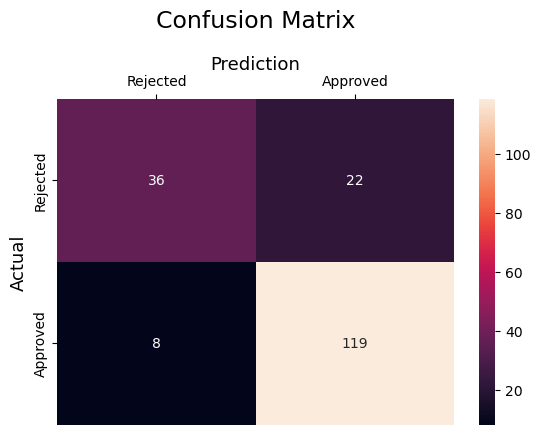

In [293]:
import seaborn as sns
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Rejected','Approved'],
            yticklabels=['Rejected','Approved'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.show()

In [297]:
accuracy = accuracy_score(y_test.values,y_pred)
print("Accuracy of model: ",accuracy)

Accuracy of model:  0.8378378378378378


In [327]:
roc_auc_score(y_test,y_pred)

0.7788487645940809

In [333]:
recall_score(y_test,y_pred)

0.937007874015748

# Final Testing 

In [335]:
test = pd.read_csv(r'C:\Users\Abhin\OneDrive\Desktop\Machine Learning Projects\Loan Prediction Problem Dataset\test_lAUu6dG.csv')

In [338]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [342]:
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

In [349]:
imp_feature

Index(['Loan_Amount_Term', 'Property_Area', 'Total_Income', 'Dependents',
       'Credit_History', 'LoanAmount', 'Married'],
      dtype='object')

In [344]:
X_final_test = test[imp_feature]

In [367]:
X_final_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Loan_Amount_Term  367 non-null    float64
 1   Property_Area     367 non-null    int64  
 2   Total_Income      367 non-null    int64  
 3   Dependents        367 non-null    int32  
 4   Credit_History    367 non-null    float64
 5   LoanAmount        362 non-null    float64
 6   Married           367 non-null    object 
dtypes: float64(3), int32(1), int64(2), object(1)
memory usage: 18.8+ KB


# Exploratory Data Analysis

In [355]:
mode_value = statistics.mode(X_final_test.Loan_Amount_Term)
X_final_test.Loan_Amount_Term = X_final_test.Loan_Amount_Term.fillna(mode_value)

In [359]:
X_final_test.Property_Area = X_final_test.Property_Area.apply(area)

In [361]:
X_final_test.Dependents = X_final_test.Dependents.apply(lambda x : 3 if x == "3+" else x)
mode_value = statistics.mode(X_final_test.Dependents)
X_final_test.Dependents = X_final_test.Dependents.fillna(mode_value)
X_final_test.Dependents = X_final_test.Dependents.astype('int')

In [365]:
mode_value = statistics.mode(X_final_test.Credit_History)
X_final_test.Credit_History = X_final_test.Credit_History.fillna(mode_value)

In [373]:
med_val = np.median(X_final_test.LoanAmount)
X_final_test.LoanAmount = X_final_test.groupby('Married')['LoanAmount'].transform(lambda x: x.fillna(x.median()))

In [375]:
X_final_test.Married = X_final_test.Married.apply(lambda x : 1 if x == 'Gender' else 0)

# Predict the final Test

In [377]:
y_final_pred = random_search_stack.predict(X_final_test)

In [379]:
submission = pd.DataFrame({
    'Loan_ID': test['Loan_ID'],  
    'Loan_Status': y_final_pred
})

In [396]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [392]:
print("These People are eligible to taking loan")
submission[submission['Loan_Status'] == 1].count()

These People are eligible to taking loan


Loan_ID        281
Loan_Status    281
dtype: int64

In [394]:
print("These People are not eligible to taking loan")
submission[submission['Loan_Status'] == 0].count()

These People are not eligible to taking loan


Loan_ID        86
Loan_Status    86
dtype: int64

# Conclusion
# After identifying the top 7 important features using Random Forest, a stacking ensemble model was built using:

# Random Forest
# Support Vector Machine (SVC)
# XGBoost
# ...with Logistic Regression as the meta-classifier.

# The model was tuned using RandomizedSearchCV for optimal performance